In [30]:
from ast import literal_eval
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from gensim.test.utils import datapath
sns.set()

## Products Datasets

In [4]:
products = pd.read_csv("products.csv",converters={"tags": literal_eval})
products.head()

,product_id,title,tags,creation_date,price,weight,express_delivery,category,minimum_quantity,print_count_product,view_count_product,cart_count_product,order_count_product
0,101,Jogo Banheiro de Crochê de 3 Peças,"[#jogobanheiro #croche #tapetes, decoração, na...",2022-09-25 13:43:36,110.0,1.0,1,Técnicas de Artesanato,1,11,0,0,0
1,106,Guardanapos de Tecido - 100 unidades,"[guardanapos de tecido, guradanapo, festa, eve...",2014-12-26 18:47:48,269.5,0.0,0,Casa,1,62,6,0,0
2,47,Toalha Papai Noel,"[natal, toalha de natal, toalha de mesa, papai...",2013-11-06 20:43:27,291.1,0.0,0,Casa,1,423,4,0,0
3,8589941942,Caixa para 1 bis feliz natal cliente como você...,"[lembrança, personalizados, festa, caixas, cai...",2021-11-22 15:02:30,45.0,0.0,0,Lembrancinhas,30,2746,93,6,2
4,17179869192,Árvore de Natal decorada em MDF,"[#madajoartesanato, #decoraçaodenatal, #enfeit...",2020-12-18 18:52:35,100.0,0.0,0,Decoração,1,1010,4,0,0


In [5]:
products.groupby(['express_delivery']).size().reset_index(name='counts')

,express_delivery,counts
0,0,63302
1,1,13468


In [6]:
print("Categorias Únicas =",len(products["category"].unique()))

Categorias Únicas = 42


In [7]:
products.groupby(['category']).size().reset_index(name='counts').sort_values("counts",ascending=False)

,category,counts
24,Lembrancinhas,18709
1,Aniversário e Festas,11119
14,Decoração,10588
4,Bebê,6112
28,Papel e Cia,5294
11,Casamento,4448
10,Casa,3822
35,Roupas,3401
21,Infantil,2290
13,Convites,1894


In [8]:
def cdf(df, col):
    aux_ecdf = ECDF(df[col])
    plt.plot(aux_ecdf.x,aux_ecdf.y,label="Price",color="b",linewidth=2)
    plt.title(col)
    plt.show()
    

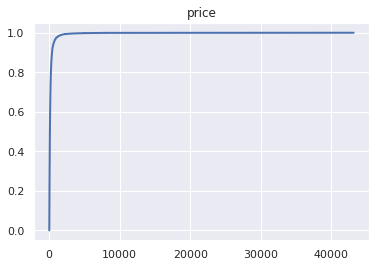

In [9]:
cdf(products,"price")

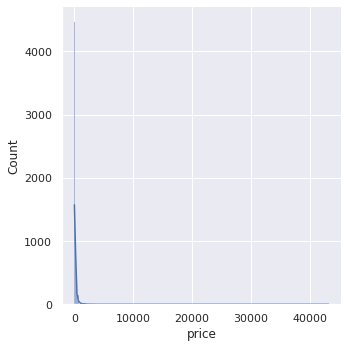

In [10]:
sns.displot(products["price"],kde=True)

In [11]:
# qual o preço do produto mais caro?
max(products["price"])

43150.0

In [12]:
# qual o produto mais caro?
products[products["price"]==43150]

,product_id,title,tags,creation_date,price,weight,express_delivery,category,minimum_quantity,print_count_product,view_count_product,cart_count_product,order_count_product
49740,17179882988,Cartão de visita,[cartão de visita],2022-02-27 08:54:43,43150.0,0.0,0,Convites,500,14,1,0,0


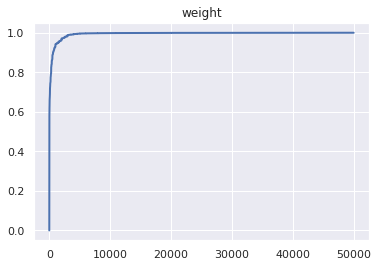

In [13]:
cdf(products,"weight")

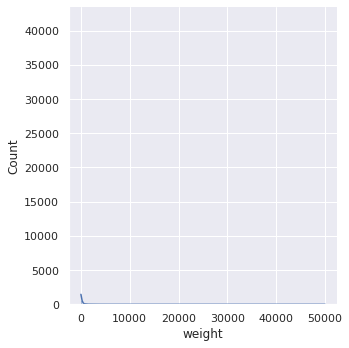

In [14]:
sns.displot(products["weight"],kde=True)
plt.show()

In [15]:
max(products["weight"])

50000.0

In [16]:
products[products["weight"]==50000]

,product_id,title,tags,creation_date,price,weight,express_delivery,category,minimum_quantity,print_count_product,view_count_product,cart_count_product,order_count_product
3260,8589947023,Cama Montessori Com Grades Duplas Solteiro Eco,[cgds],2017-11-24 20:56:54,999.9,50000.0,0,Infantil,1,4867,90,2,1
7352,17179876573,Cama Infantil Montessoriana,"[kids, reciclavel, sustentavel, infantil, deco...",2019-02-27 16:49:11,1450.0,50000.0,0,Infantil,1,15153,196,1,0
18595,8589938295,Cama Montessoriana Solteiro Envernizada Eco,[csm],2017-11-24 21:12:57,899.9,50000.0,0,Infantil,1,15023,193,2,0
24904,8589940622,Cama Montessoriana Oca Solteiro Eco,"[cmos, cama oca, cama solteiro, cama infantil,...",2018-11-22 22:18:05,999.9,50000.0,0,Infantil,1,14504,107,2,1
26274,25769811127,Espelho Decorativo Amadeirado Antíqua Lindo 18...,"[espelho decorativo, espelho chanfrado, espelh...",2020-06-29 11:59:11,1199.0,50000.0,0,Decoração,1,564,30,2,0
26960,17179885193,gaveteiro closet porta joias e acessórios luxo...,"[armário, gaveteiro, closet, porta-joias, luxo...",2021-10-08 09:04:35,2499.0,50000.0,0,Decoração,1,1617,105,2,0
45896,8589951074,Cama Jardim Encantado Solteiro,"[cama jardim, cama solteiro, cama infantil, ca...",2022-05-05 20:58:49,1350.0,50000.0,0,Infantil,1,554,44,0,0


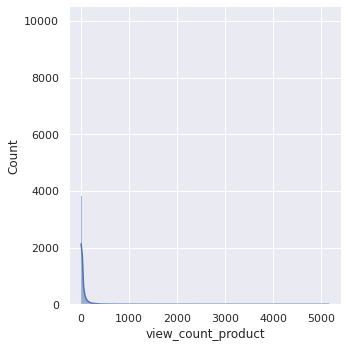

In [17]:
sns.displot(products["view_count_product"],kde=True)

#### Wordcloud

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import nltk

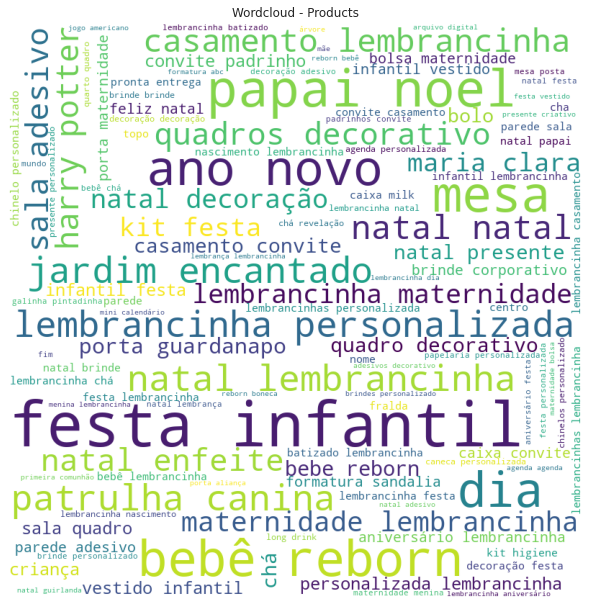

In [19]:
stopwords = nltk.corpus.stopwords.words('portuguese')
 
all_words = ''

for tags in products["tags"]:
     
    val = ""
    for t in tags:
        val = val + t + " "
    val.replace('#', '')
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    all_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud - Products")
 
plt.show()

### LDA

In [20]:
from gensim.corpora.dictionary import Dictionary
import gensim 

my_texts = []
for tags in products["tags"]:
     
    val = ""
    for t in tags:
        val = val + t + " "

    val = val.split(" ")
    val = [w for w in val if not w.lower() in stopwords]
    my_texts.append(val)

In [21]:
my_texts

[['#jogobanheiro',
  '#croche',
  '#tapetes',
  'decoração',
  'cores',
  'chumbo',
  'rosa',
  'bebê',
  ''],
 ['guardanapos',
  'tecido',
  'guradanapo',
  'festa',
  'evento',
  '15',
  'anos',
  'casamento',
  'aniversário',
  ''],
 ['natal',
  'toalha',
  'natal',
  'toalha',
  'mesa',
  'papai',
  'noel',
  'feito',
  'mão',
  'crochê',
  'crochet',
  ''],
 ['lembrança',
  'personalizados',
  'festa',
  'caixas',
  'caixinhas',
  'rose',
  'gold',
  'folhas',
  'folhagem',
  'verde',
  'branco',
  'verde',
  'branco',
  'minnie',
  'rosa',
  'minnie',
  'rosa',
  'jardim',
  'jardim',
  'encantado',
  'fada',
  'morena',
  'fadinha',
  'pj',
  'pjmask',
  'natal',
  'ano',
  'novo',
  'feliz',
  'natal',
  'brindes',
  'corporativo',
  'card',
  'bis',
  'cartão',
  'natal',
  ''],
 ['#madajoartesanato',
  '#decoraçaodenatal',
  '#enfeitedenatal',
  '#arvoredenataldecoradaemmdf',
  ''],
 ['saquinho',
  'maternidade',
  'organizador',
  'bolsa',
  'maternidade',
  'laço',
  'perol

In [41]:
try:
    temp_file = datapath("lda_model")
    lda_model = gensim.models.ldamodel.LdaModel.load(temp_file)
except Exception as e:
    id2word = Dictionary(my_texts) 
    corpus = [id2word.doc2bow(text) for text in my_texts]  
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=10, 
                                               random_state=100,
                                               update_every=1,
                                               chunksize=100,
                                               passes=10,
                                               alpha='auto',
                                               per_word_topics=True)

In [39]:
lda_model.print_topics()

[(0,
  '0.311*"natal" + 0.051*"" + 0.047*"bolo" + 0.032*"topo" + 0.031*"ano" + 0.029*"noel" + 0.028*"mdf" + 0.026*"papai" + 0.023*"novo" + 0.021*"presente"'),
 (1,
  '0.094*"maternidade" + 0.066*"kit" + 0.052*"bolsa" + 0.043*"bebê" + 0.042*"menina" + 0.037*"menino" + 0.034*"bebe" + 0.032*"camiseta" + 0.029*"" + 0.023*"azul"'),
 (2,
  '0.068*"agenda" + 0.046*"personalizada" + 0.044*"planner" + 0.043*"presente" + 0.038*"2023" + 0.030*"capa" + 0.028*"arquivo" + 0.026*"" + 0.023*"personalizado" + 0.020*"nome"'),
 (3,
  '0.118*"festa" + 0.051*"infantil" + 0.019*"safari" + 0.019*"aniversário" + 0.018*"" + 0.018*"jardim" + 0.017*"lembrancinha" + 0.017*"decoração" + 0.015*"kit" + 0.014*"sonic"'),
 (4,
  '0.053*"mesa" + 0.046*"porta" + 0.042*"" + 0.029*"crochê" + 0.027*"croche" + 0.025*"aliança" + 0.021*"guardanapo" + 0.021*"toalha" + 0.020*"decoração" + 0.019*"alianças"'),
 (5,
  '0.143*"lembrancinha" + 0.046*"lembrança" + 0.039*"lembrancinhas" + 0.032*"chá" + 0.032*"brinde" + 0.025*"dia" + 0.

In [40]:
temp_file = datapath("lda_model")
lda_model.save(temp_file)

## Pairs Dataset

In [25]:
pairs = pd.read_csv("pairs.csv")
pairs.head()

,pair_id,product_id,query,search_position,print_count_query,view_count_query,cart_count_query,order_count_query
0,8589934593,14817,Convite Padrinhos Batismo,319,2374,18,1,0
1,8589934636,14884,Decoracao De Casamento,254,388,1,0,0
2,8589934836,8589934668,Toalha De Lavabo,233,219,2,0,0
3,8589934727,17179884005,Calendario 2023 Editavel,40,4871,2,0,0
4,8589934934,25769803777,Ecobag,286,166,3,0,0


In [26]:
len(pairs)

89832

In [54]:
# queries unicas
len(pairs["query"].unique())

249

In [53]:
# quantos produtos relevantes por query
pairs.groupby("query",as_index=False).count()[["query","product_id"]]

,query,product_id
0,Adesivo De Parede Cafe Cafezinho Na Xicara Gra...,194
1,Agenda,397
2,Agenda 2023,399
3,Aliancas De Casamento,363
4,Almofada,400
...,...,...
244,Vendedor,154
245,Vestido De Croche,400
246,Vestido De Festa Infantil,399
247,Vestido De Noiva Civil,265


### Wordcloud

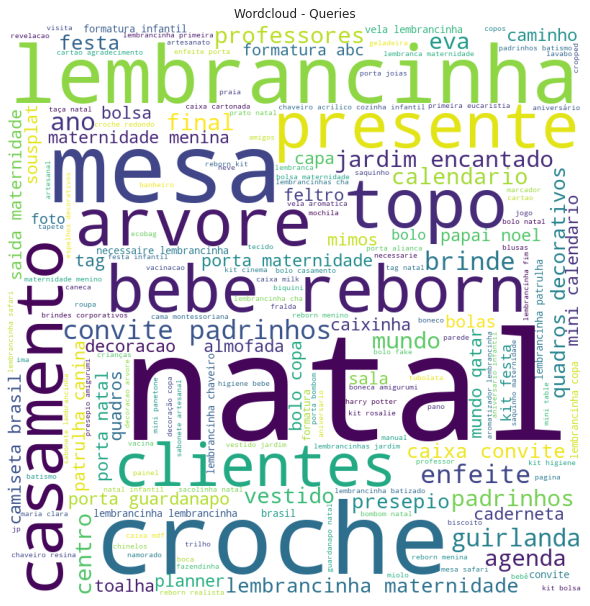

In [27]:
stopwords = nltk.corpus.stopwords.words('portuguese')
 
all_words = ''

for query in pairs["query"]:
    tokens = query.split(" ")
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    all_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title("Wordcloud - Queries")
 
plt.show()